## P1 OpenCV简介

[OpenCV-Python Tutorials](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)

tool:
- [numpy](https://numpy.org/devdocs/reference/index.html)

## P2 课程框架

- Introduction to OpenCV 介绍
- Gui Features in OpenCV GUI特性
- Core Operations 核心处理
- Image Processing in OpenCV 图像处理
- Feature Detection and Description 特征检测 识别
- Video analysis (video module) 视频分析
- Camera Calibration and 3D Reconstruction 相机校正 3D还原
- Machine Learning 机器学习
- Computational Photography 计算机图像处理
- Object Detection (objdetect module) 目标检测
- OpenCV-Python Bindings 绑定

## P3 图像读取显示和存储


4.0.1
<class 'numpy.ndarray'> (512, 512)
<class 'numpy.ndarray'> (512, 512, 3)
<class 'numpy.ndarray'> (512, 512, 4)
<class 'NoneType'> None


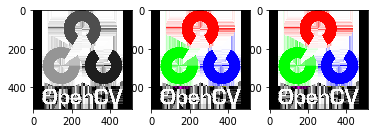

True


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
# 行内显示
%matplotlib inline

print(cv.__version__)
img1 = cv.imread('./img/opencv-logo.png',0)# 灰色
img2 = cv.imread('./img/opencv-logo.png',1)# 彩色
img3 = cv.imread('./img/opencv-logo.png',-1)#含透明通道
imgerr = cv.imread('./img/err',-1)#含透明通道

print(type(img1),img1.shape)
print(type(img2),img2.shape)
print(type(img3),img3.shape)
print(type(imgerr),imgerr)

# cv.imshow('image1',img1)# 
# cv.waitKey(0)# 迭代按键 永久
# cv.destroyAllWindows()# 关闭窗口

# # cv.WINDOW_AUTOSIZE 自动大小
# # cv.WINDOW_NORMAL 可调整窗口大小
# cv.namedWindow('opencv-logo',cv.WINDOW_NORMAL)
# cv.imshow('opencv-logo',img2) # 名字要一样
# k = cv.waitKey(3000)# 这里是毫秒 超时返回-1
# print(k)
# cv.destroyAllWindows()

# vc.imread颜色顺序是GBR plt里是颜色顺序是RGB
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(img3)
plt.show()

print(cv.imwrite("./img/cv_img3.png",img3))


## P4 补充说明waitKey与ord


In [2]:
import cv2 as cv

img1 = cv.imread('./img/opencv-logo.png',0)
cv.imshow('img1',img1)
while True:
    k = cv.waitKey(0) & 0xff
    print(k)
    if k == 27: # esc 退出
        break
    elif k == ord('s'): # 's'保存
        cv.imwrite("./img/cv_img1.png",img1)
        break
    
cv.destroyAllWindows()

#显示使用信息
ord?

115


## P5 绘图函数

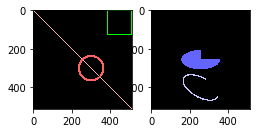

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img=np.zeros((512,512,3),np.uint8)
cv.line(img,(0,0),(511,511),(180,180,255),5)
# imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(imageRGB)
# plt.show()

cv.rectangle(img,(384,3),(510,128),(0,255,0),3)
# imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(imageRGB)
# plt.show()

cv.circle(img,(300,300),63,(100,100,255),10)
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(imageRGB)
# plt.show()

## 椭圆
# https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69
# img	=	cv.ellipse(	img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]	)
#     img         图片数据
#     center      中心位置
#     axes        长轴/短轴
#     angle       旋转
#     startAngle  画图起始角度
#     endAngle    画图结束角度

img2 = np.zeros((512,512,3),np.uint8)
cv.ellipse(img2,(256,256),(100,50), 0,0,270, (255,100,100),-1)#填充
cv.ellipse(img2,(256,400),(100,50), 30,0,270, (255,200,200),6)
imageRGB2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
plt.subplot(132)
plt.imshow(imageRGB2)
plt.show()

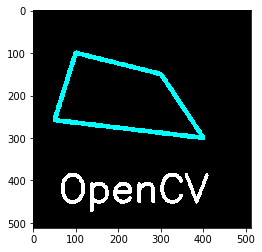

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 多边形
#形状为 ROWSx1x2 的数组 ROWS是顶点数

img=np.zeros((512,512,3),np.uint8)
pts=np.array([[100,100],[300,150],[400,300],[50,258]],np.int32)
# print(pts.shape)
# pts = pts.reshape((-1,1,2))
# print(pts,pts.shape)
cv.polylines(img,[pts],True,(0,255,255),10) # True为封闭
imageRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
# plt.show()

## 添加文字

# 文字 位置 字体 大小 颜色 粗细 线条类型
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(60,450),font,3,(255,255,255),8)
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## P6-7 画opencv的logo

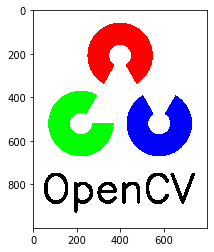

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

width = 800
r1 = 50
r2 = 150
interval = 360

base = 520

o1 = ((width - interval)//2,base)
o2 = ((width + interval)//2,base)
o3 = (width//2, int(base-3**0.5*interval/2))

img = np.full((1000,width,3),255,np.uint8)

cv.ellipse(img,o1,(r2,r2), 0,0,300, (0,255,0),-1)
cv.ellipse(img,o2,(r2,r2), 300,0,300, (255,0,0),-1)
cv.ellipse(img,o3,(r2,r2), 120,0,300, (0,0,255),-1)
cv.circle(img,o1,r1,(255,255,255),-1)
cv.circle(img,o2,r1,(255,255,255),-1)
cv.circle(img,o3,r1,(255,255,255),-1)

cv.putText(img,"OpenCV",(40,880),cv.FONT_HERSHEY_SIMPLEX,6,(0,0,0),16)


imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()


## P8 双击鼠标画圆

In [88]:
import cv2 as cv

events = [i for i in dir(cv) if 'EVENT' in i]
print('\nevent>\n','\n'.join(events))
events = [i for i in dir(cv) if 'FONT' in i]
print('\nfont>\n','\n'.join(events))


event>
 EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP

font>
 FONT_HERSHEY_COMPLEX
FONT_HERSHEY_COMPLEX_SMALL
FONT_HERSHEY_DUPLEX
FONT_HERSHEY_PLAIN
FONT_HERSHEY_SCRIPT_COMPLEX
FONT_HERSHEY_SCRIPT_SIMPLEX
FONT_HERSHEY_SIMPLEX
FONT_HERSHEY_TRIPLEX
FONT_ITALIC
QT_FONT_BLACK
QT_FONT_BOLD
QT_FONT_DEMIBOLD
QT_FONT_LIGHT
QT_FONT_NORMAL


In [94]:
import cv2 as cv
import numpy as np

def draw_circle(event, x,y, flags,param):
    global img
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),50,(255,200,200),-1)

img=np.zeros((512,512,3),np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

## P9 鼠标绘制矩形或曲线

In [1]:
import numpy as np
import cv2 as cv

drawing = False
mode = True
ix,iy = -1,-1

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if(drawing == True):
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((255,255,3),np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)&0xFF
    if k == ord('m'):
        mode = not mode
    elif k==27:
        break
cv.destroyAllWindows()

## P10 滑动条调色板

In [1]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

img = np.zeros((300,510,3),np.uint8)
cv.namedWindow('image')

cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch,'image',0,1,nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')

    if s == 0:
        img[:]=0
    else:
        img[:]=[b,g,r]
cv.destroyAllWindows()

## P11 数组赋值方法

In [3]:
import numpy as np
img = np.zeros((3,2,3),np.uint8)
print(img,' <',id(img))
img[:] = [100,200,300]
print(img,' <',id(img))

[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]  < 2001038737616
[[[100 200  44]
  [100 200  44]]

 [[100 200  44]
  [100 200  44]]

 [[100 200  44]
  [100 200  44]]]  < 2001038737616


...

## P12 自定义颜色的鼠标绘图

In [6]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

img = np.full((300,510,3),255,np.uint8)
cv.namedWindow('image')

cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch,'image',0,1,nothing)


drawing = False
mode = True
ix,iy = -1,-1
color = (0,0,0)

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode,color
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if(drawing == True):
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),color,-1)
            else:
                cv.circle(img,(x,y),5,color,-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),color,-1)
        else:
            cv.circle(img,(x,y),5,color,-1)

cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)&0xFF
    if k == ord('m'):
        mode = not mode
    elif k==27:
        break
    
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')

    if s == 1:
        img[:]=255
    else:
        color=[b,g,r]

cv.destroyAllWindows()